# Y: Continuous

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/savagedata/regression-tree-tutorial/master/kelly_blue_book_2005.csv")

df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.95760,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.13290,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.89323,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [3]:
data = df[['Mileage', 'Make', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Price']]

In [4]:
data

,Mileage,Make,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,Buick,Sedan,6,3.1,4,1,1,1,17314.10313
1,9135,Buick,Sedan,6,3.1,4,1,1,0,17542.03608
2,13196,Buick,Sedan,6,3.1,4,1,1,0,16218.84786
3,16342,Buick,Sedan,6,3.1,4,1,0,0,16336.91314
4,19832,Buick,Sedan,6,3.1,4,1,0,1,16339.17032
...,...,...,...,...,...,...,...,...,...,...
799,16229,Saturn,Sedan,6,3.0,4,1,0,0,16507.07027
800,19095,Saturn,Sedan,6,3.0,4,1,1,0,16175.95760
801,20484,Saturn,Sedan,6,3.0,4,1,1,0,15731.13290
802,25979,Saturn,Sedan,6,3.0,4,1,1,0,15118.89323


In [5]:
# Features와 target 나누기
t_features = data[data.columns[:-1]]
t_target = data[data.columns[-1]]

In [6]:
# One-hot Encoding (decision tree는 비모수적 방법이므로, dummy변수를 하나 제거하는게 아니다! 살린다.)
t_features = pd.get_dummies(data = t_features, columns = ['Type'], prefix = 'Type')
t_features = pd.get_dummies(data = t_features, columns = ['Make'], prefix = 'Make')

In [7]:
df.groupby('Make')['Price'].mean()

Make
Buick        20815.113883
Cadillac     40936.335448
Chevrolet    16427.599347
Pontiac      18412.100422
SAAB         29494.704687
Saturn       13978.807560
Name: Price, dtype: float64

In [8]:
len(df[df['Make']=='Cadillac'])

80

In [9]:
t_features

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221,6,3.1,4,1,1,1,0,0,0,1,0,1,0,0,0,0,0
1,9135,6,3.1,4,1,1,0,0,0,0,1,0,1,0,0,0,0,0
2,13196,6,3.1,4,1,1,0,0,0,0,1,0,1,0,0,0,0,0
3,16342,6,3.1,4,1,0,0,0,0,0,1,0,1,0,0,0,0,0
4,19832,6,3.1,4,1,0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,4,1,0,0,0,0,0,1,0,0,0,0,0,0,1
800,19095,6,3.0,4,1,1,0,0,0,0,1,0,0,0,0,0,0,1
801,20484,6,3.0,4,1,1,0,0,0,0,1,0,0,0,0,0,0,1
802,25979,6,3.0,4,1,1,0,0,0,0,1,0,0,0,0,0,0,1


In [10]:
t_target

0      17314.10313
1      17542.03608
2      16218.84786
3      16336.91314
4      16339.17032
          ...     
799    16507.07027
800    16175.95760
801    15731.13290
802    15118.89323
803    13585.63680
Name: Price, Length: 804, dtype: float64

In [11]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    t_features, t_target, test_size = 0.2, random_state = 312)

In [12]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

643
643
161
161


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


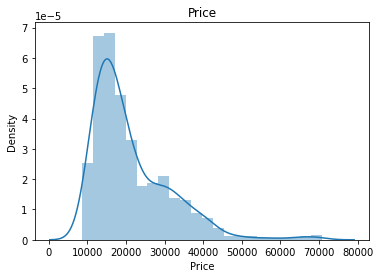

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(pd.DataFrame(train_target).loc[pd.DataFrame(train_target)['Price'].notnull(), 'Price'])
plt.title('Price')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor
'''
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
criterion = 'mse' 또는 'mae' (default='mse')
max_depth = None (default)
min_samples_leaf = 1 (default)
min_samples_split = None (default)
'''
tree = DecisionTreeRegressor(random_state = 312)

tree_fit = tree.fit(train_features, train_target)

In [15]:
tree_fit

DecisionTreeRegressor(random_state=312)

In [16]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=312)) # default model로 시작
# hyper-parameter 값을 바꾸면서 여러 모델 사용

In [17]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeregressor', 'decisiontreeregressor__ccp_alpha', 'decisiontreeregressor__criterion', 'decisiontreeregressor__max_depth', 'decisiontreeregressor__max_features', 'decisiontreeregressor__max_leaf_nodes', 'decisiontreeregressor__min_impurity_decrease', 'decisiontreeregressor__min_samples_leaf', 'decisiontreeregressor__min_samples_split', 'decisiontreeregressor__min_weight_fraction_leaf', 'decisiontreeregressor__random_state', 'decisiontreeregressor__splitter'])

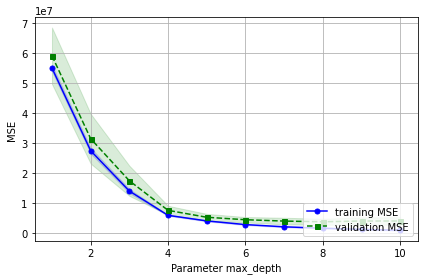

In [18]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서 비교 대상 선정
                                                   param_range=param_range,
                                                   scoring= "neg_mean_squared_error",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MSE')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation MSE')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MSE')
# plt.ylim([-20.00, 100.00])
plt.tight_layout()
plt.show()

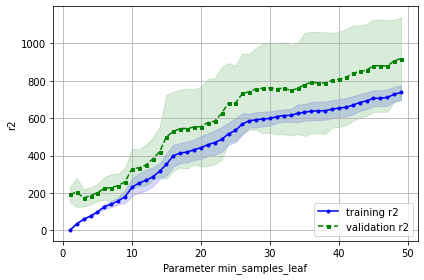

In [19]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = np.arange(1, 50, 1) # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__min_samples_leaf', #pipe_tree.get_params().keys()에서 비교 대상 선정
                                                   param_range=param_range,
                                                   scoring= "neg_mean_poisson_deviance",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=3, label='training r2')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=3,
        label='validation r2')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of min_samples_leaf')
plt.legend(loc='lower right')
plt.xlabel('Parameter min_samples_leaf')
plt.ylabel('r2')
# plt.ylim([-20.00, 100.00])
plt.tight_layout()
plt.show()

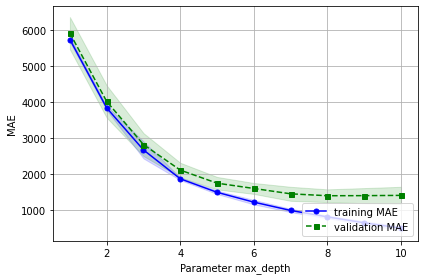

In [20]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서 비교 대상 선정
                                                   param_range=param_range,
                                                   scoring= "neg_mean_absolute_error",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MAE')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation MAE')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MAE')
# plt.ylim([-20.00, 100.00])
plt.tight_layout()
plt.show()

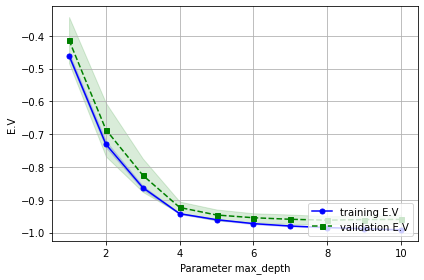

In [21]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서 비교 대상 선정
                                                   param_range=param_range,
                                                   scoring= "explained_variance",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training E.V')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation E.V')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('E.V')
# plt.ylim([-20.00, 100.00])
plt.tight_layout()
plt.show()


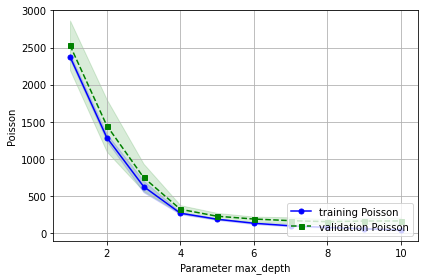

In [22]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features,
                                                   y = train_target,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서 비교 대상 선정
                                                   param_range=param_range,
                                                   scoring= "neg_mean_poisson_deviance",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training Poisson')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation Poisson')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Poisson')
# plt.ylim([-20.00, 100.00])
plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
param_range1 = [4]
param_range2 = [10]
param_range3 = ['squared_error', 'absolute_error', 'poisson'] # 'explained_variance' 등도 가능

param_grid = [{'decisiontreeregressor__max_depth': param_range1,
              'decisiontreeregressor__min_samples_leaf': param_range2,
              'decisiontreeregressor__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1)

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

12104569.050737794
{'decisiontreeregressor__criterion': 'absolute_error', 'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 10}


In [25]:
from sklearn.model_selection import GridSearchCV
param_range1 = [4]
param_range2 = [10]
param_range3 = ['squared_error', 'absolute_error', 'poisson'] # 'explained_variance' 등도 가능

param_grid = [{'decisiontreeregressor__max_depth': param_range1,
              'decisiontreeregressor__min_samples_leaf': param_range2,
              'decisiontreeregressor__criterion': param_range3}]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1)

gs = gs.fit(train_features, train_target)

print(-gs.best_score_)
print(gs.best_params_)

12104569.050737794
{'decisiontreeregressor__criterion': 'absolute_error', 'decisiontreeregressor__max_depth': 4, 'decisiontreeregressor__min_samples_leaf': 10}


In [26]:
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_features, train_target)

Pipeline(steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                                       min_samples_leaf=10,
                                       random_state=312))])

In [45]:
best_tree_for_graph = DecisionTreeRegressor(criterion='absolute_error', max_depth=4, min_samples_leaf=10, random_state = 312)
best_tree_for_graph.fit(train_features, train_target)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=10, random_state=312)

In [46]:
y_pred = best_tree.predict(test_features)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(test_target, y_pred))
print('MSE: %.3f' % mean_squared_error(test_target,y_pred))

# 참고: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.metrics

R squared: 0.784
MSE: 17133308.980


In [48]:
import numpy as np
feature_names = train_features.columns.tolist()
target_name = np.array(['Price'])

In [49]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph_best.write_png('tree_best_regression.png') #Tree 이미지를 저장

True

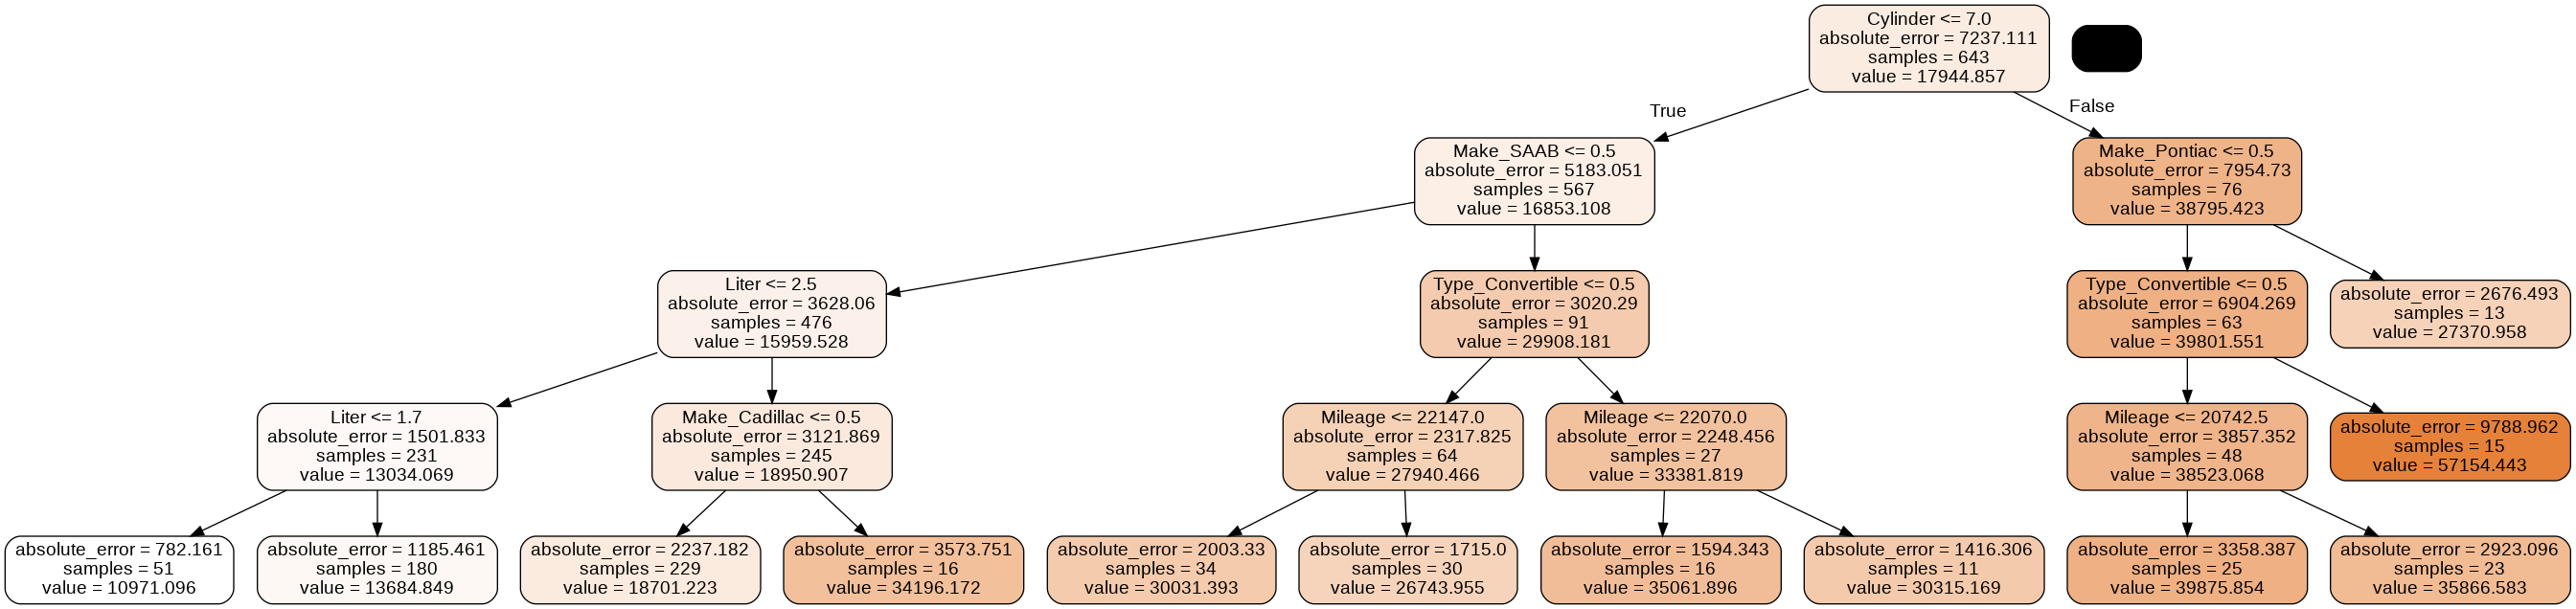

In [50]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

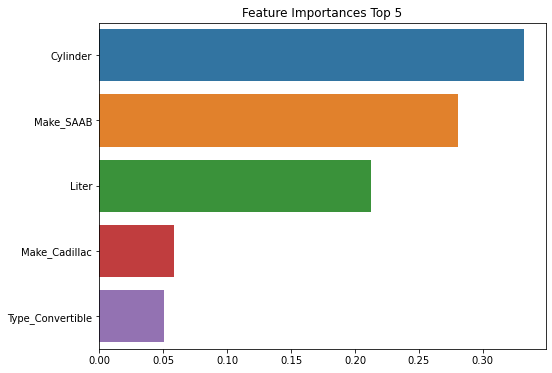

In [51]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
feature_importances = pd.Series(feature_importance_values, index=train_features.columns)
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [52]:
feature_importances.sort_values(ascending=False)

Cylinder            0.332646
Make_SAAB           0.280768
Liter               0.212400
Make_Cadillac       0.058541
Type_Convertible    0.050575
Make_Pontiac        0.040392
Mileage             0.024679
Type_Wagon          0.000000
Make_Chevrolet      0.000000
Make_Buick          0.000000
Type_Hatchback      0.000000
Type_Sedan          0.000000
Type_Coupe          0.000000
Leather             0.000000
Sound               0.000000
Cruise              0.000000
Doors               0.000000
Make_Saturn         0.000000
dtype: float64